In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%pylab inline
#seaborn settings
sns.set_palette("deep", desat=.6)
sns.set_context(rc={"figure.figsize": (10,6)})
% matplotlib inline
plt.style.use('ggplot')

Populating the interactive namespace from numpy and matplotlib


In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [4]:
#load the data
df = pd.read_csv('cleaned set.csv')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20060 entries, 0 to 20059
Data columns (total 15 columns):
Unnamed: 0                            20060 non-null int64
Facility Size (sq Ft)                 19602 non-null float64
Revenue (US Dollars, million)         17217 non-null float64
Net Income (US Dollars, million)      17217 non-null float64
Total Employees                       17249 non-null float64
Total Assets (US Dollars, million)    17217 non-null float64
Owns Rents_Owns                       20060 non-null int64
Importer                              20060 non-null int64
Exporter                              20060 non-null int64
Manufacturing                         20060 non-null int64
Women Owned                           20060 non-null int64
Minority Owned                        20060 non-null int64
RevPerEm                              16856 non-null float64
RevPerSq                              16821 non-null float64
SqPerEm                               16844 non-nul

In [10]:
df = df.dropna()

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16468 entries, 0 to 20018
Data columns (total 15 columns):
Unnamed: 0                            16468 non-null int64
Facility Size (sq Ft)                 16468 non-null float64
Revenue (US Dollars, million)         16468 non-null float64
Net Income (US Dollars, million)      16468 non-null float64
Total Employees                       16468 non-null float64
Total Assets (US Dollars, million)    16468 non-null float64
Owns Rents_Owns                       16468 non-null int64
Importer                              16468 non-null int64
Exporter                              16468 non-null int64
Manufacturing                         16468 non-null int64
Women Owned                           16468 non-null int64
Minority Owned                        16468 non-null int64
RevPerEm                              16468 non-null float64
RevPerSq                              16468 non-null float64
SqPerEm                               16468 non-nul

In [12]:
#splitting into features and target
y = df['Exporter']
X = df[['Importer', 'Manufacturing','RevPerEm', 'RevPerSq', 'Owns Rents_Owns']]

In [19]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=42)

# Create the classifier: logreg
logreg = LogisticRegression()

# Fit the classifier to the training data
logreg.fit(X_train,y_train)

# Predict the labels of the test set: y_pred
y_pred = logreg.predict(X_test)

# Compute and print the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[6132    1]
 [ 454    1]]
             precision    recall  f1-score   support

          0       0.93      1.00      0.96      6133
          1       0.50      0.00      0.00       455

avg / total       0.90      0.93      0.90      6588



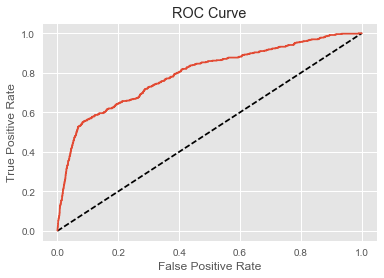

In [16]:
from sklearn.metrics import roc_curve

# Compute predicted probabilities: y_pred_prob
y_pred_prob = logreg.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [17]:
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score

# Compute predicted probabilities: y_pred_prob
y_pred_prob = logreg.predict_proba(X_test)[:,1]

# Compute and print AUC score
print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))

# Compute cross-validated AUC scores: cv_auc
cv_auc = cross_val_score(logreg, X, y, cv = 5,scoring = 'roc_auc')

# Print list of AUC scores
print("AUC scores computed using 5-fold cross-validation: {}".format(cv_auc))


AUC: 0.7941958742382679
AUC scores computed using 5-fold cross-validation: [ 0.82337555  0.8282049   0.78742601  0.79705181  0.75578277]


In [13]:
# Setup the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space}

In [14]:
# Instantiate a logistic regression classifier: logreg
logreg = LogisticRegression()

# Instantiate the GridSearchCV object: logreg_cv
logreg_cv = GridSearchCV(logreg, param_grid, cv=5)

# Fit it to the data
logreg_cv.fit(X,y)

# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_)) 
print("Best score is {}".format(logreg_cv.best_score_))

Tuned Logistic Regression Parameters: {'C': 31.622776601683793}
Best score is 0.9294996356570319


In [25]:
# Create the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space, 'penalty': ['l1', 'l2']}

# Instantiate the logistic regression classifier: logreg
logreg = LogisticRegression()

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.4, random_state= 42)

# Instantiate the GridSearchCV object: logreg_cv
logreg_cv = GridSearchCV(logreg, param_grid,cv = 5)

# Fit it to the training data
logreg_cv.fit(X_train, y_train)

# Print the optimal parameters and best score
print("Tuned Logistic Regression Parameter: {}".format(logreg_cv.best_params_))
print("Tuned Logistic Regression Accuracy: {}".format(logreg_cv.best_score_))


Tuned Logistic Regression Parameter: {'C': 3.7275937203149381, 'penalty': 'l1'}
Tuned Logistic Regression Accuracy: 0.9281376518218624


### Conclusion
After tuning the 'C' and 'penalty' parameters, and using the features of Revenue per Employee, Revenue per Sq Ft, Importer, Manufacturer, and Own vs Rent, the model can predict whether a company will export with an accuracy of about 93%. That's pretty good.